In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [11]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port alfred za
saskylakh ru
port elizabeth za
kruisfontein za
rikitea pf
saint anthony ca
mataura pf
hobart au
grand gaube mu
cape town za
khasan ru
lata sb
tupik ru
vaini to
saskylakh ru
fairview ca
morondava mg
vaitupu wf
nilanga in
trinidad cu
punta arenas cl
ushuaia ar
new norfolk au
busselton au
kavieng pg
punta arenas cl
saint-pierre pm
ikungi tz
lebu cl
carnarvon au
thompson ca
hilo us
kysyl-syr ru
laureles py
kadiri in
vila do maio cv
jamestown sh
rikitea pf
arraial do cabo br
busselton au
broome au
bowen au
ushuaia ar
cagliari it
albany au
mataura pf
castro cl
butaritari ki
qeshm ir
rikitea pf
vaitupu wf
muli mv
fortuna us
ushuaia ar
capoeiras br
guymon us
taolanaro mg
carnarvon za
katsuura jp
rikitea pf
chokurdakh ru
jamestown sh
birao cf
balgazyn ru
hobart au
palauig ph
saint-pierre pm
oxapampa pe
saskylakh ru
albany au
new norfolk au
atuona pf
stornoway gb
mataura pf
punta arenas cl
san angelo us
praia da vitoria pt
lata sb
necochea ar
arraial do cabo br
beringovskiy ru
rik

kapaa us
cidreira br
kapaa us
strai no
bonavista ca
punta arenas cl
marawi sd
atuona pf
inhambane mz
saint combs gb
wajir ke
kattivakkam in
isangel vu
ushuaia ar
waverley nz
san patricio mx
qaqortoq gl
georgetown sh
ushuaia ar
chuy uy
norman wells ca
arraial do cabo br
butaritari ki
adrar dz
ushuaia ar
vaini to
qaanaaq gl
pangody ru
garowe so
tuktoyaktuk ca
vaini to
kapaa us
atambua id
busselton au
baghdad iq
narsaq gl
iqaluit ca
maloy no
amderma ru
bada ru
new norfolk au
kapaa us
naftah tn
padang id
ushuaia ar
saint-joseph re
castro cl
adelaide au
muisne ec
ponta do sol cv
mar del plata ar
yenagoa ng
ribeira grande pt
rikitea pf
vaini to
thompson ca
mendahara id
morgan city us
fortuna us
broken hill au
kapaa us
hermanus za
qaanaaq gl
puerto ayora ec
ushuaia ar
cape town za
neiafu to
hobart au
new norfolk au
hilo us
port alfred za
provideniya ru
mataura pf
westport nz
osakarovka kz
saldanha za
antofagasta cl
kenora ca
castro cl
punta arenas cl
puerto ayora ec
paragominas br
carnarvon a

cidreira br
arraial do cabo br
taoudenni ml
ulladulla au
beyneu kz
saint-philippe re
salinopolis br
rikitea pf
tuktoyaktuk ca
busselton au
bayanday ru
busselton au
bluff nz
san policarpo ph
plettenberg bay za
bluff nz
makakilo city us
new norfolk au
hobart au
victoria sc
bandipur in
kieta pg
punta arenas cl
puerto ayora ec
attawapiskat ca
college us
rio gallegos ar
ushuaia ar
tessalit ml
san vicente ph
mys shmidta ru
khatanga ru
saint-pierre re
korla cn
tasiilaq gl
dunedin nz
rikitea pf
saskylakh ru
mantamados gr
faya td
ushuaia ar
kysyl-syr ru
port alfred za
hofn is
vardo no
maroantsetra mg
butaritari ki
rikitea pf
rikitea pf
ranong th
te anau nz
mouila ga
beringovskiy ru
rikitea pf
mar del plata ar
mahebourg mu
new norfolk au
tuktoyaktuk ca
ushuaia ar
mar del plata ar
sataua ws
tsihombe mg
sao joao da barra br
acajutla sv
laguna br
bandar-e anzali ir
axim gh
valenca do piaui br
albany au
bambous virieux mu
upernavik gl
busselton au
ulaanbaatar mn
asyut eg
newcastle au
gat ly
ushuaia 

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7241cf62e84755c526cdfc174edf4b1a


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | saint anthony
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | grand gaube
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | khasan
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | tupik
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | fairview
Processing Record 16 of Set 1 | morondava
Processing Record 17 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 18 of Set 1 | nilanga
Processing Record 19 of Set 1 | trinidad
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | new norfolk
Process

Processing Record 40 of Set 4 | tuatapere
Processing Record 41 of Set 4 | kamiiso
Processing Record 42 of Set 4 | qandala
Processing Record 43 of Set 4 | price
Processing Record 44 of Set 4 | la ronge
Processing Record 45 of Set 4 | swift current
Processing Record 46 of Set 4 | pangoa
Processing Record 47 of Set 4 | kapaa
Processing Record 48 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | marawi
Processing Record 1 of Set 5 | salinas
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | los andes
Processing Record 5 of Set 5 | saint george
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | christchurch
Processing Record 9 of Set 5 | bend
Processing Record 10 of Set 5 | miri
Processing Record 11 of Set 5 | enshi
Processing Record 12 of Set 5 | kihei
Processing Record 13 of Set 5 | ampanihy
P

Processing Record 30 of Set 8 | kattivakkam
Processing Record 31 of Set 8 | isangel
Processing Record 32 of Set 8 | waverley
Processing Record 33 of Set 8 | chuy
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | pangody
Processing Record 36 of Set 8 | garowe
Processing Record 37 of Set 8 | tuktoyaktuk
Processing Record 38 of Set 8 | atambua
Processing Record 39 of Set 8 | baghdad
Processing Record 40 of Set 8 | maloy
Processing Record 41 of Set 8 | bada
Processing Record 42 of Set 8 | padang
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | adelaide
Processing Record 45 of Set 8 | muisne
Processing Record 46 of Set 8 | yenagoa
Processing Record 47 of Set 8 | mendahara
City not found. Skipping...
Processing Record 48 of Set 8 | morgan city
Processing Record 49 of Set 8 | westport
Processing Record 50 of Set 8 | osakarovka
Processing Record 1 of Set 9 | kenora
Processing Record 2 of Set 9 | paragominas
Processing Record 3 of Set 9 | mackay
P

Processing Record 17 of Set 12 | boyolangu
Processing Record 18 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 19 of Set 12 | nanakuli
Processing Record 20 of Set 12 | lavrentiya
Processing Record 21 of Set 12 | haines junction
Processing Record 22 of Set 12 | lyngseidet
Processing Record 23 of Set 12 | halalo
City not found. Skipping...
Processing Record 24 of Set 12 | acarau
Processing Record 25 of Set 12 | maroantsetra
Processing Record 26 of Set 12 | sechura
Processing Record 27 of Set 12 | moerai
Processing Record 28 of Set 12 | olafsvik
Processing Record 29 of Set 12 | kralendijk
Processing Record 30 of Set 12 | gandajika
Processing Record 31 of Set 12 | the valley
Processing Record 32 of Set 12 | george town
Processing Record 33 of Set 12 | hailar
Processing Record 34 of Set 12 | svelgen
Processing Record 35 of Set 12 | codrington
Processing Record 36 of Set 12 | kudahuvadhoo
Processing Record 37 of Set 12 | berezovka
Processing Record 38 of Set 12

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,61.00,89,3,4.00,ZA,2020-06-21 04:00:42
1,Saskylakh,71.92,114.08,81.23,34,98,2.95,RU,2020-06-21 03:57:03
2,Port Elizabeth,-33.92,25.57,59.00,93,16,18.34,ZA,2020-06-21 04:00:47
3,Kruisfontein,-34.00,24.73,54.14,95,20,8.88,ZA,2020-06-21 04:00:47
4,Rikitea,-23.12,-134.97,74.32,83,83,16.93,PF,2020-06-21 04:00:29
5,Saint Anthony,45.02,-93.22,66.20,68,1,3.36,US,2020-06-21 04:07:01
6,Mataura,-46.19,168.86,44.01,81,1,1.61,NZ,2020-06-21 04:00:37
7,Hobart,-42.88,147.33,53.01,87,75,6.93,AU,2020-06-21 03:57:48
8,Grand Gaube,-20.01,57.66,71.01,83,18,8.01,MU,2020-06-21 03:57:09
9,Cape Town,-33.93,18.42,60.01,93,40,10.29,ZA,2020-06-21 03:57:32


In [16]:
#Inserting new column order
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [17]:
#Inputting new column order to data frame 
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2020-06-21 04:00:42,-33.59,26.89,61.00,89,3,4.00
1,Saskylakh,RU,2020-06-21 03:57:03,71.92,114.08,81.23,34,98,2.95
2,Port Elizabeth,ZA,2020-06-21 04:00:47,-33.92,25.57,59.00,93,16,18.34
3,Kruisfontein,ZA,2020-06-21 04:00:47,-34.00,24.73,54.14,95,20,8.88
4,Rikitea,PF,2020-06-21 04:00:29,-23.12,-134.97,74.32,83,83,16.93
...,...,...,...,...,...,...,...,...,...
577,Newcastle,AU,2020-06-21 04:06:33,-32.93,151.78,60.01,93,75,5.82
578,Gat,IL,2020-06-21 04:09:21,31.61,34.76,71.01,83,3,10.02
579,Bitung,ID,2020-06-21 04:09:21,1.45,125.18,86.00,70,75,10.29
580,Puerto Penasco,MX,2020-06-21 04:09:21,31.32,-113.53,78.01,60,0,4.36


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
import time

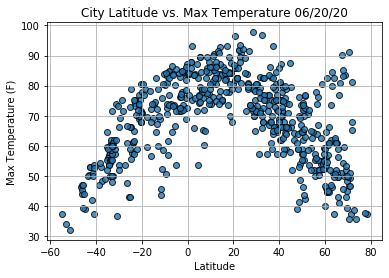

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

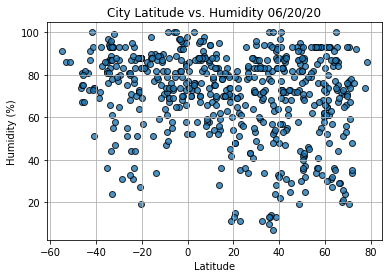

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

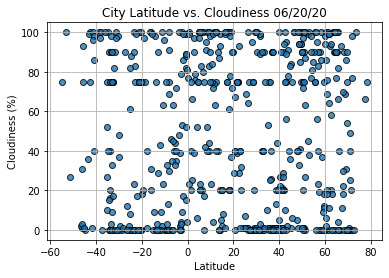

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

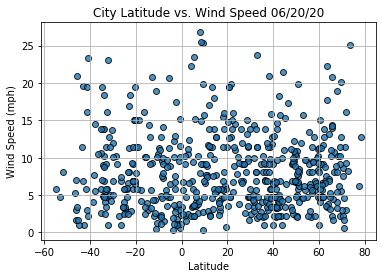

In [26]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()